In [1]:
import os
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization, Resizing
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

C:\Users\mahaj\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## Hyperparameters

HEIGHT = 150
WIDTH = 150
CHANNELS = 3

EPOCHS = 10
BATCH_SIZE = 16
LR = 0.001

In [3]:
## Data
(train_images,train_labels) = tfds.as_numpy(tfds.load('rock_paper_scissors', split='train', batch_size=-1, as_supervised = True))
(test_images,test_labels) = tfds.as_numpy(tfds.load('rock_paper_scissors', split='test', batch_size=-1, as_supervised = True))

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, vertical_flip=True, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255, vertical_flip=True, horizontal_flip=True)

In [5]:
train_data = train_datagen.flow(train_images, train_labels, batch_size=BATCH_SIZE, shuffle=True)
test_data = test_datagen.flow(test_images, test_labels, batch_size=BATCH_SIZE, shuffle=True)

In [6]:
model = Sequential([
    Resizing(HEIGHT, WIDTH),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    Conv2D(128, (7, 7), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [7]:
model.compile(optimizer=RMSprop(learning_rate=LR), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_data, epochs=EPOCHS, validation_data=test_data)

Epoch 1/10
158/158 [==============================] - 36s 151ms/step - loss: 1.1668 - accuracy: 0.3329 - val_loss: 1.0981 - val_accuracy: 0.3333
Epoch 2/10
158/158 [==============================] - 22s 138ms/step - loss: 1.0841 - accuracy: 0.3877 - val_loss: 0.9266 - val_accuracy: 0.6478
Epoch 3/10
158/158 [==============================] - 22s 138ms/step - loss: 0.5658 - accuracy: 0.7675 - val_loss: 0.4378 - val_accuracy: 0.8145
Epoch 4/10
158/158 [==============================] - 22s 136ms/step - loss: 0.2170 - accuracy: 0.9294 - val_loss: 0.2275 - val_accuracy: 0.9059
Epoch 5/10
158/158 [==============================] - 22s 138ms/step - loss: 0.1121 - accuracy: 0.9702 - val_loss: 0.1070 - val_accuracy: 0.9651
Epoch 6/10
158/158 [==============================] - 22s 141ms/step - loss: 0.0970 - accuracy: 0.9774 - val_loss: 0.2093 - val_accuracy: 0.9409
Epoch 7/10
158/158 [==============================] - 22s 137ms/step - loss: 0.1670 - accuracy: 0.9734 - val_loss: 0.2454 - val_ac

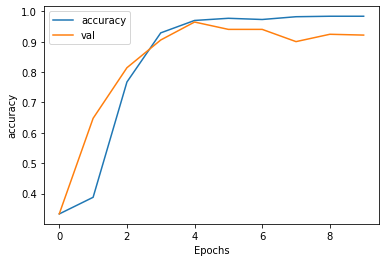

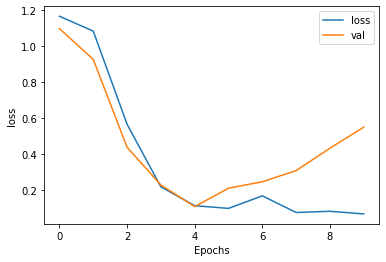

In [9]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string], label=string)
  plt.plot(history.history['val_'+string], label= "val")
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save_weights('../weights/cnn_weights.h5')
model.save('../weights/cnn.h5')